# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [47]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [3]:
#your code here
wnba = pd.read_csv('../wnba_clean.csv')
wnba

Name Team  Pos  Height  Weight        BMI Birth_Place  \
0       Aerial Powers  DAL    F     183      71  21.200991          US   
1         Alana Beard   LA  G/F     185      73  21.329438          US   
2        Alex Bentley  CON    G     170      69  23.875433          US   
3     Alex Montgomery  SAN  G/F     185      84  24.543462          US   
4        Alexis Jones  MIN    G     175      78  25.469388          US   
..                ...  ...  ...     ...     ...        ...         ...   
137     Tiffany Hayes  ATL    G     178      70  22.093170          US   
138   Tiffany Jackson   LA    F     191      84  23.025685          US   
139  Tiffany Mitchell  IND    G     175      69  22.530612          US   
140      Tina Charles   NY  F/C     193      84  22.550941          US   
141     Yvonne Turner  PHO    G     175      59  19.265306          US   

              Birthdate  Age         College Experience  Games Played  MIN  \
0      January 17, 1994   23  Michigan State          2             8  173   
1          May 14, 1982   35            Duke         12            30  947   
2      October 27, 1990   26      Penn State          4            26  617   
3     December 11, 1988   28    Georgia Tech          6            31  721   
4        August 5, 1994   23          Baylor          R            24  137   
..                  ...  ...             ...        ...           ...  ...   
137  September 20, 1989   27     Connecticut          6            29  861   
138      April 26, 1985   32           Texas          9            22  127   
139  September 23, 1984   32  South Carolina          2            27  671   
140        May 12, 1988   29     Connecticut          8            29  952   
141    October 13, 1987   29        Nebraska          2            30  356   

     FGM  FGA   FG%  3PM  3PA   3P%  FTM  FTA   FT%  OREB  DREB  REB  AST  \
0     30   85  35.3   12   32  37.5   21   26  80.8     6    22   28   12   
1     90  177  50.8    5   18  27.8   32   41  78.0    19    82  101   72   
2     82  218  37.6   19   64  29.7   35   42  83.3     4    36   40   78   
3     75  195  38.5   21   68  30.9   17   21  81.0    35   134  169   65   
4     16   50  32.0    7   20  35.0   11   12  91.7     3     9   12   12   
..   ...  ...   ...  ...  ...   ...  ...  ...   ...   ...   ...  ...  ...   
137  144  331  43.5   43  112  38.4  136  161  84.5    28    89  117   69   
138   12   25  48.0    0    1   0.0    4    6  66.7     5    18   23    3   
139   83  238  34.9   17   69  24.6   94  102  92.2    16    70   86   39   
140  227  509  44.6   18   56  32.1  110  135  81.5    56   212  268   75   
141   59  140  42.1   11   47  23.4   22   28  78.6    11    13   24   30   

     STL  BLK  TO  PTS  DD2  TD3  
0      3    6  12   93    0    0  
1     63   13  40  217    0    0  
2     22    3  24  218    0    0  
3     20   10  38  188    2    0  
4      7    0  14   50    0    0  
..   ...  ...  ..  ...  ...  ...  
137   37    8  50  467    0    0  
138    1    3   8   28    0    0  
139   31    5  40  277    0    0  
140   21   22  71  582   11    0  
141   18    1  32  151    0    0  

[142 rows x 32 columns]

# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [11]:
# your answer here
#Requirements are that our sample is big enough 
#Out of the EDA we know that Weight follows an approximate standard distribution.
#Further we will use the mean standard deviation as an estimator for our population standard deviation.

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [4]:
# your code here
conf_int = stats.norm.interval(0.95, np.mean(wnba['Weight']), np.std(wnba['Weight'])/(142)**(1/2))
conf_int

(77.17665079176093, 80.78109568711231)

**What can you say about these results?**

In [10]:
#your-answer-here
#We are 95% confident that the average weight of a professional female basketbalplayer lies between 77kg and 81kg

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [9]:
#your-answer-here
#That she can be 95% confident in her statement, but point out that there are players who weigh 67kg and less and who play
#professional basketball and that weight is not the only metric used in judging if someone can play in a professional league.

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

In [8]:
# your code here

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [10]:
# your answer here
#Requirements: 

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [23]:
# your code here
from statsmodels.stats.proportion import proportion_confint

int_1 = proportion_confint(count=(wnba['FTA'].sum()-wnba['FTM'].sum()),    # Number of "successes"
                   nobs=wnba['FTA'].sum(),    # Number of trials
                   alpha=(1 - 0.95))
print(int_1)

wnba_ftf = pd.DataFrame(wnba['FT%'])
wnba_ftf['FT_F%'] = 100-wnba['FT%']        #Percentage of failed free throws.
len(wnba_ftf.loc[(wnba_ftf['FT_F%']>40)])   #Amount of players who miss more than 40% of their free throws.

int_2 = proportion_confint(count=14,    # Number of "successes"
                   nobs=142,    # Number of trials
                   alpha=(1 - 0.95))
print(int_2)

#19% to 20% of players miss their free throws. == INT 1
#5% to 14% of players miss more than 40% of their free throws. == INT 2

(0.19069760071765568, 0.20941639187282596)
(0.049558988317297346, 0.14762411027425193)


**What can you comment about our result? What would you tell your sister?**

In [15]:
#your-answer-here
#We can say with 95% confidence that the sister her statement is wrong.

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [ ]:
#your code here

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [16]:
#your-answer-here

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [15]:
#your code here
#H0: Average AST of WNBA = Average AST of WNBA+NBA
#Ha: Average AST of WNBA != Average AST of WNBA+NBA
#Alpha: 0.05

In [43]:
#your-answer-here
import numpy as np
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(wnba['AST'], 52)
print(stat, pval)

-2.1499947192482898 0.033261541354107166


**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [42]:
#your-answer-here
#H0: Average AST of WNBA < Average AST of WNBA+NBA
#Ha: Average AST of WNBA > Average AST of WNBA+NBA
#Alpha: 0.05

import numpy as np
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(wnba['AST'], 52)
print(stat, pval/2)

-2.1499947192482898 0.016630770677053583


# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [ ]:
#your code here

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here

In [19]:
# your code here

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here

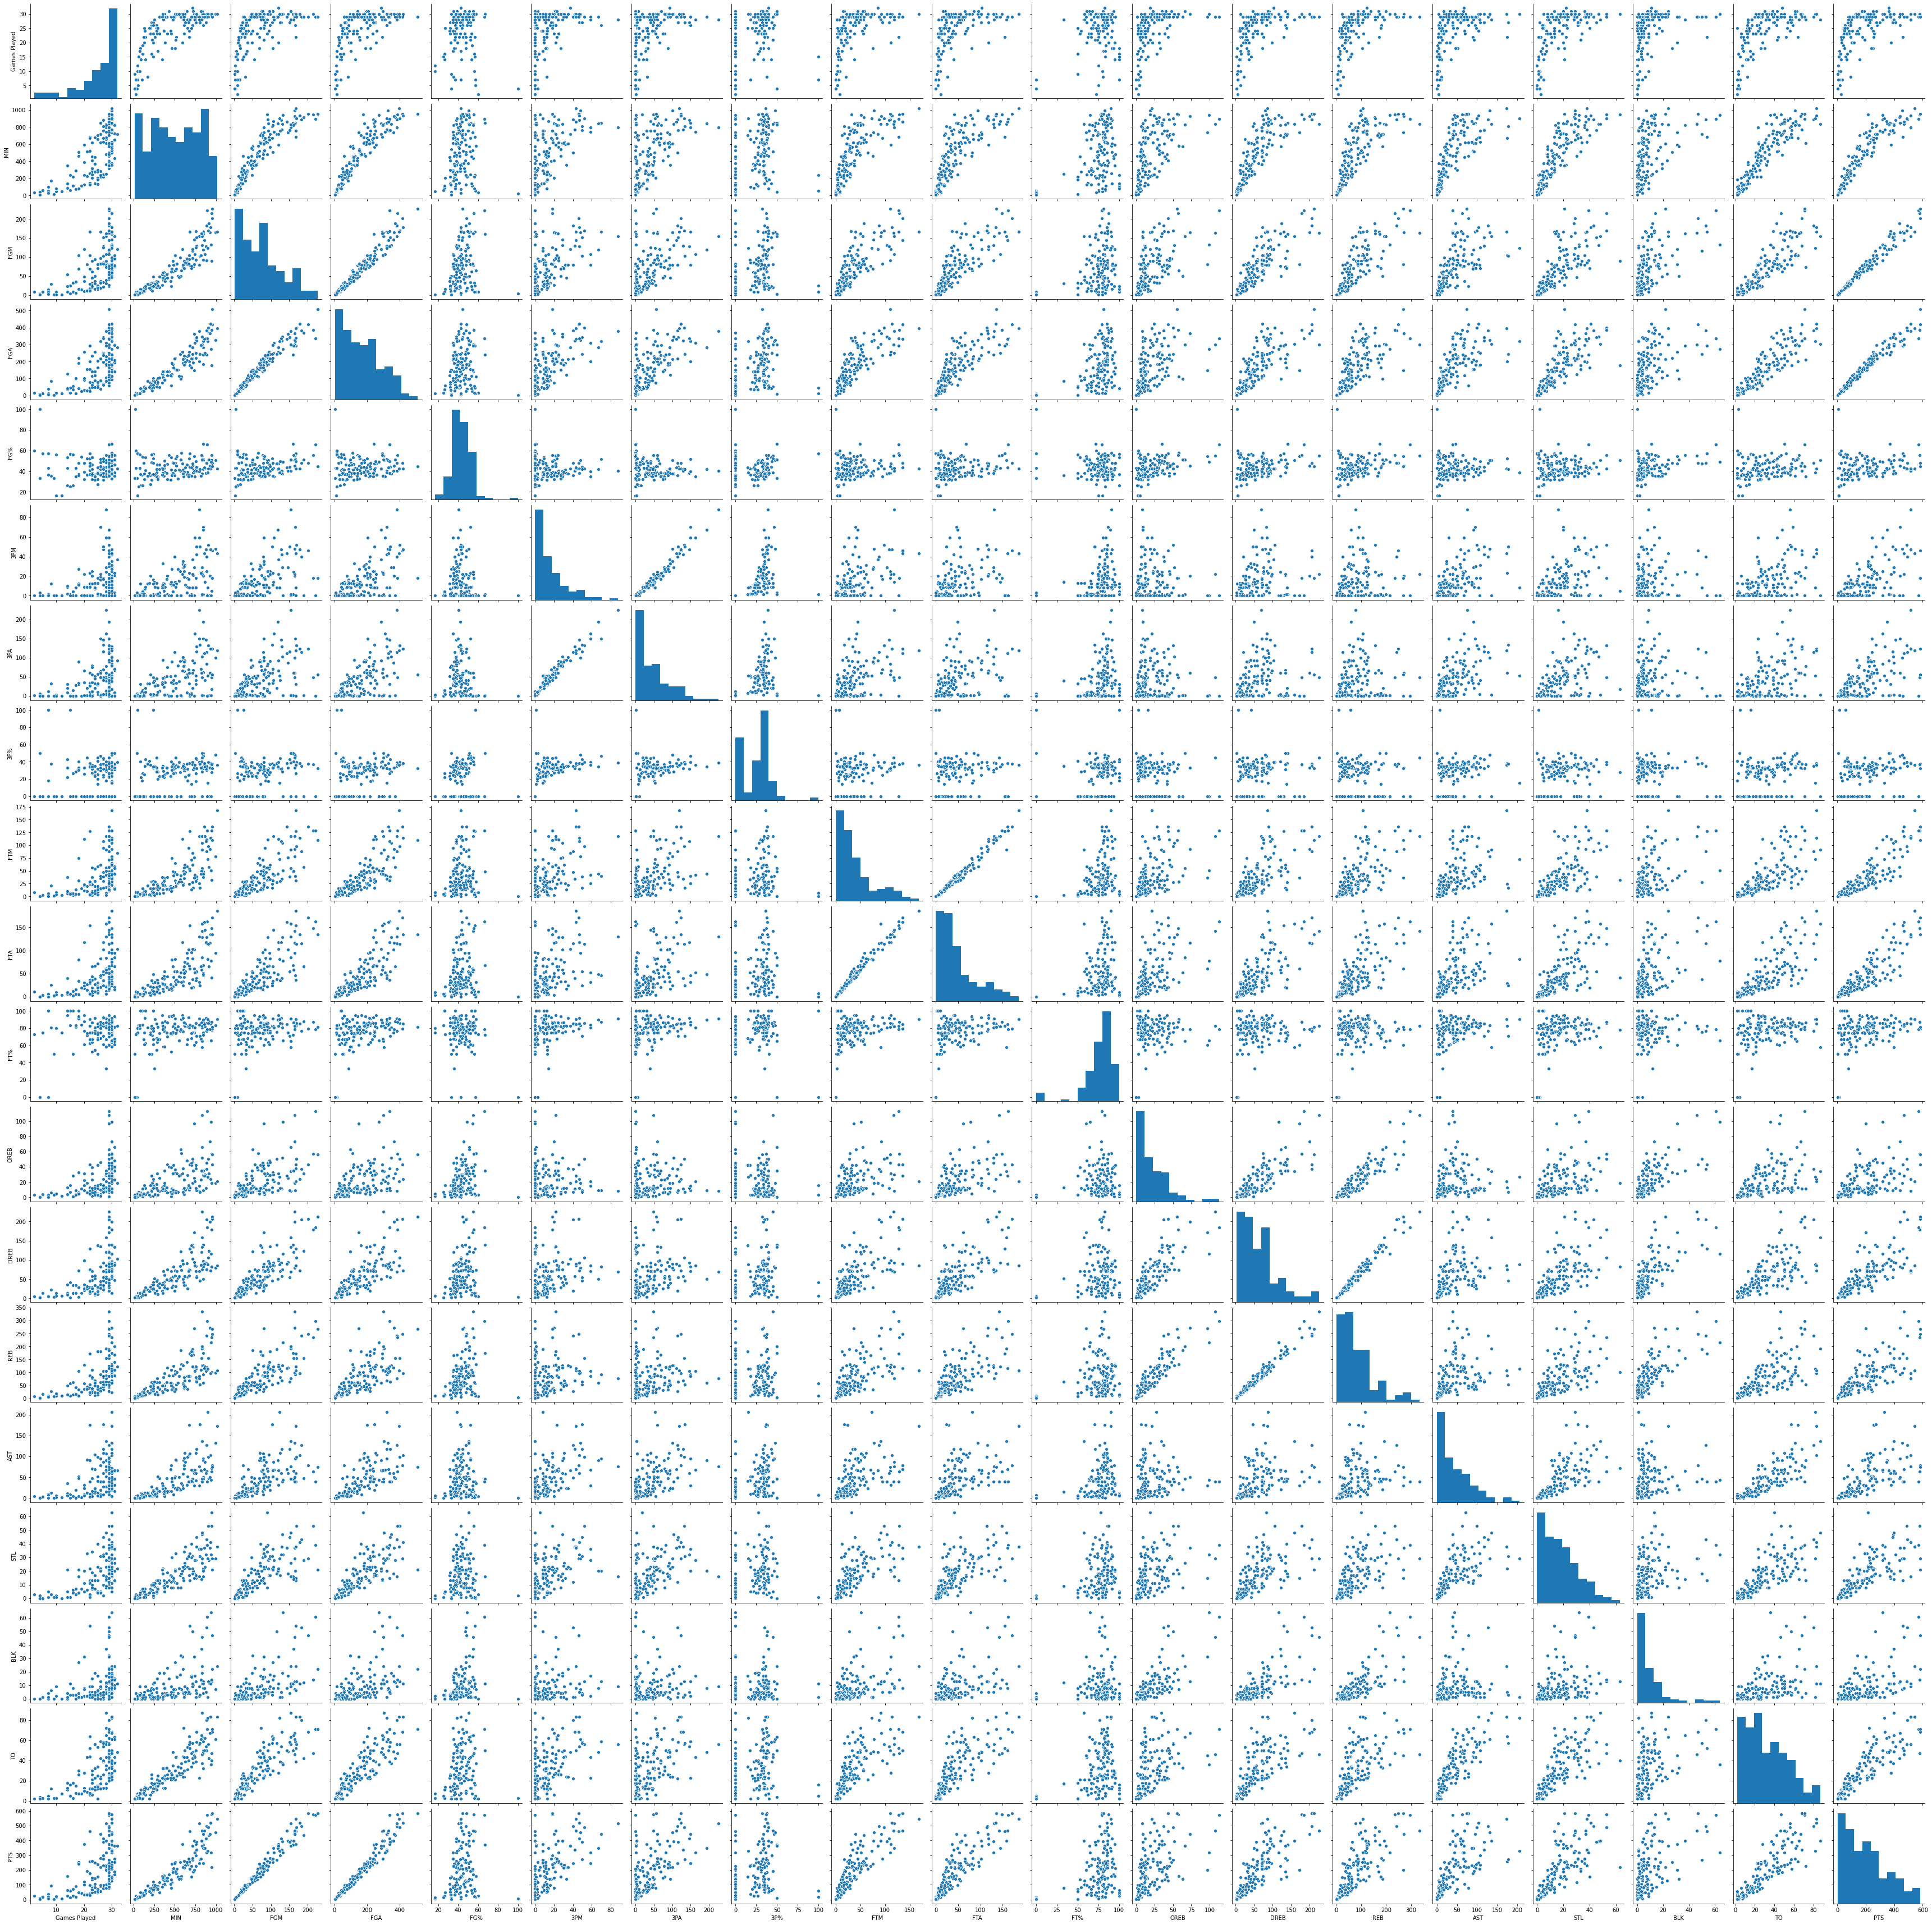

In [49]:
import seaborn as sns
corr_wnba = sns.pairplot(wnba, vars = ['Games Played','MIN','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST',
                'STL','BLK','TO','PTS'])
corr_wnba

In [56]:
wnba.head(60)

Name Team  Pos  Height  Weight        BMI Birth_Place  \
0          Aerial Powers  DAL    F     183      71  21.200991          US   
1            Alana Beard   LA  G/F     185      73  21.329438          US   
2           Alex Bentley  CON    G     170      69  23.875433          US   
3        Alex Montgomery  SAN  G/F     185      84  24.543462          US   
4           Alexis Jones  MIN    G     175      78  25.469388          US   
5        Alexis Peterson  SEA    G     170      63  21.799308          US   
6          Alexis Prince  PHO    G     188      81  22.917610          US   
7          Allie Quigley  CHI    G     178      64  20.199470          US   
8           Allisha Gray  DAL    G     185      76  22.205990          US   
9      Allison Hightower  WAS    G     178      77  24.302487          US   
10          Alysha Clark  SEA    F     180      76  23.456790          US   
11         Alyssa Thomas  CON    F     188      84  23.766410          US   
12       Amanda Zahui B.   NY    C     196     113  29.414827          SE   
13          Amber Harris  CHI    F     196      88  22.907122          US   
14          Aneika Henry  ATL  F/C     193      87  23.356332          JM   
15        Angel Robinson  PHO  F/C     198      88  22.446689          US   
16           Asia Taylor  WAS    F     185      76  22.205990          US   
17       Bashaara Graves  CHI    F     188      91  25.746944          US   
18         Breanna Lewis  DAL    C     196      93  24.208663          US   
19       Breanna Stewart  SEA  F/C     193      77  20.671696          US   
20          Bria Hartley   NY    G     173      66  22.052190          US   
21           Bria Holmes  ATL    G     185      77  22.498174          US   
22        Briann January  IND    G     173      65  21.718066          US   
23         Brionna Jones  CON    F     191     104  28.507990          US   
24         Brittany Boyd   NY    G     175      71  23.183673          US   
25       Brittney Griner  PHO    C     206      93  21.915355          US   
26        Brittney Sykes  ATL    G     175      66  21.551020          US   
27        Camille Little  PHO    F     188      82  23.200543          US   
28        Candace Parker   LA  F/C     193      79  21.208623          US   
29        Candice Dupree  IND    F     188      81  22.917610          US   
30      Cappie Pondexter  CHI    G     175      73  23.836735          US   
31        Carolyn Swords  SEA    C     198      95  24.232221          US   
32          Cayla George  PHO    C     193      87  23.356332          AU   
33          Chelsea Gray   LA    G     180      77  23.765432          US   
34       Cheyenne Parker  CHI    F     193      86  23.087868          US   
35   Clarissa dos Santos  SAN    C     185      89  26.004383          BR   
36        Courtney Paris  DAL    C     193     113  30.336385          US   
37  Courtney Vandersloot  CHI    G     173      66  22.052190          US   
38     Courtney Williams  CON    G     173      62  20.715694          US   
39     Crystal Langhorne  SEA  F/C     188      84  23.766410          US   
40        Damiris Dantas  ATL    C     191      89  24.396261          BR   
41        Danielle Adams  CON  F/C     185     108  31.555880          US   
42     Danielle Robinson  PHO    G     175      57  18.612245          US   
43         Dearica Hamby  SAN    F     191      86  23.573915          US   
44      Devereaux Peters  IND    F     188      79  22.351743          US   
45         Diana Taurasi  PHO    G     183      74  22.096808          US   
46     Elena Delle Donne  WAS  G/F     196      85  22.126197          US   
47    Elizabeth Williams  ATL  F/C     191      87  23.848030          US   
48           Emma Cannon  PHO    F     188      86  24.332277          US   
49        Emma Meesseman  WAS    C     193      83  22.282477          BE   
50      Epiphanny Prince   NY    G     175      81  26.448980          US   
51         Erica

In [65]:
wnba_team = wnba.groupby(['Team'])['PTS','Experience'].mean().reset_index()
wnba_team

<ipython-input-65-845c73467e77>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wnba_team = wnba.groupby(['Team'])['PTS','Experience'].mean().reset_index()


Team         PTS
0   ATL  222.818182
1   CHI  215.727273
2   CON  212.833333
3   DAL  169.916667
4   IND  220.416667
5    LA  201.916667
6   MIN  261.000000
7    NY  177.000000
8   PHO  216.166667
9   SAN  165.615385
10  SEA  192.500000
11  WAS  192.750000

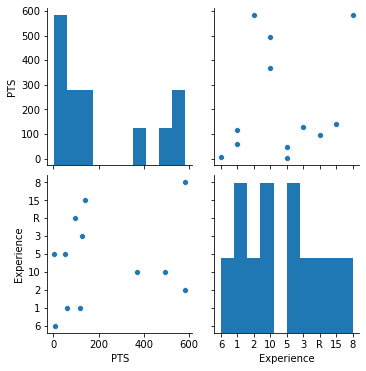

In [61]:
wnba_FC = wnba.loc[(wnba['Pos']== 'F/C')]
wnba_exp_FC = sns.pairplot(wnba_FC, vars = ['PTS', 'Experience'])

In [59]:
wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)